## Libraries

In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

## **Import data**

In [2]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col=0)
#https://www.dropbox.com/s/xmuzgboj79fjm0y/segmentation%20data.csv?dl=0
#https://www.dropbox.com/s/aeempuvpqy9kjz0/segmentation%20data%20legend.xlsx?dl=0

## **Explore Data**

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
# caso o index nao tenha funcionado na importacao

#df_segmentation.set_index('ID', inplace = True)
#df_segmentation.head()

In [5]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## **Correlation Estimate**

In [6]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


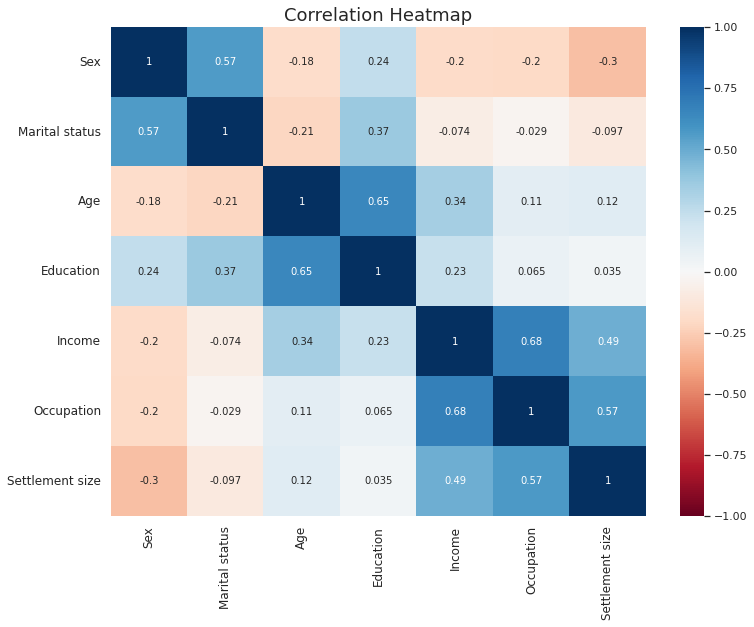

In [7]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation =0 , fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap', fontsize = 18)
plt.show()

## **Visualize Raw Data**

Text(0.5, 1.0, 'Visualization of raw data')

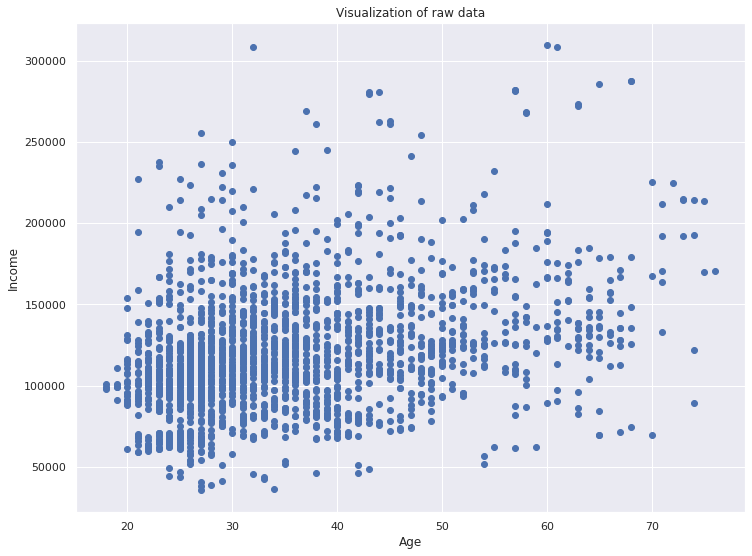

In [8]:
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:, 2],df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## **Standardization**

In [9]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)


In [10]:
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## **Hierarchical Clustering**

O Cluster hierarquico, possui o processamento mais lento, porém pode auxiliar a determinar a quantidade de cluster quando executarmos outro algoritmo (k-means, por exemplo)


In [11]:
hier_clust = linkage(segmentation_std, method = 'ward')

In [12]:
hier_clust

array([[4.78000000e+02, 1.95700000e+03, 3.41213651e-04, 2.00000000e+00],
       [6.73000000e+02, 8.21000000e+02, 3.93708059e-04, 2.00000000e+00],
       [8.67000000e+02, 9.33000000e+02, 8.92404934e-04, 2.00000000e+00],
       ...,
       [3.99200000e+03, 3.99500000e+03, 5.67337517e+01, 1.18000000e+03],
       [3.99000000e+03, 3.99400000e+03, 6.30691755e+01, 8.20000000e+02],
       [3.99600000e+03, 3.99700000e+03, 7.73495855e+01, 2.00000000e+03]])

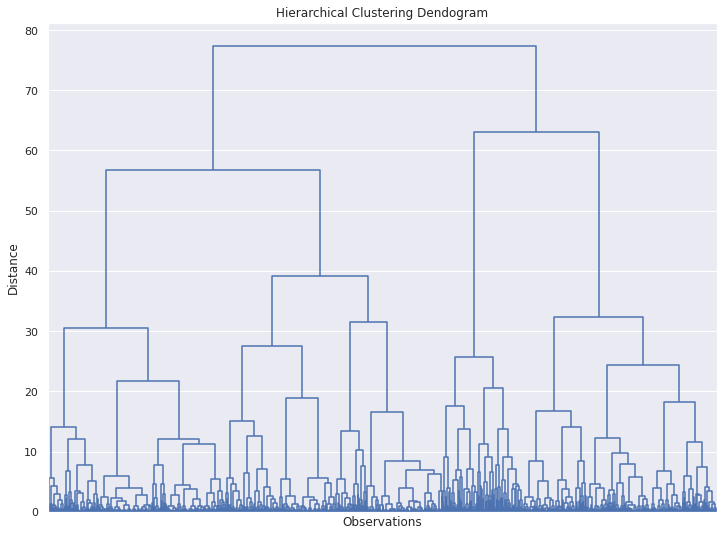

In [13]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           show_leaf_counts = False,
           no_labels = True,
           color_threshold = 0)
plt.show()

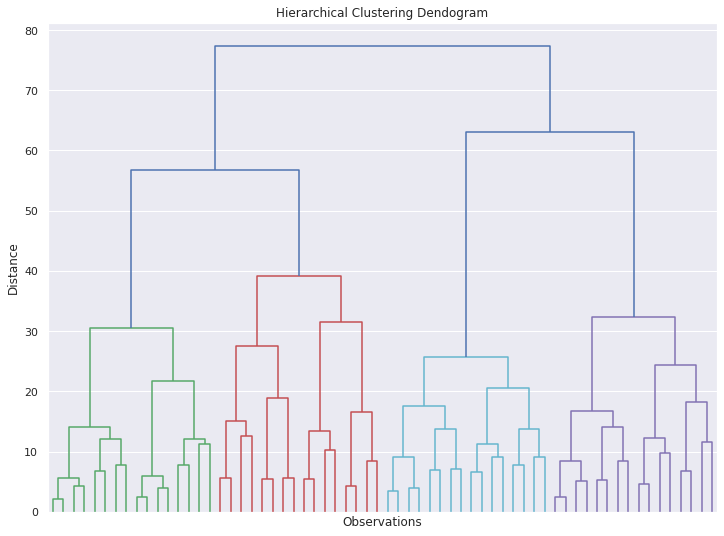

In [14]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', #facultativo
           p= 5, #facultativo junto com o anterior
           show_leaf_counts = False,
           no_labels = True)
plt.show()


## **K-Means Clustering**

In [15]:
#nova forma para encontrar o numero ideal de clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans.fit(segmentation_std)
  wcss.append(kmeans.inertia_)

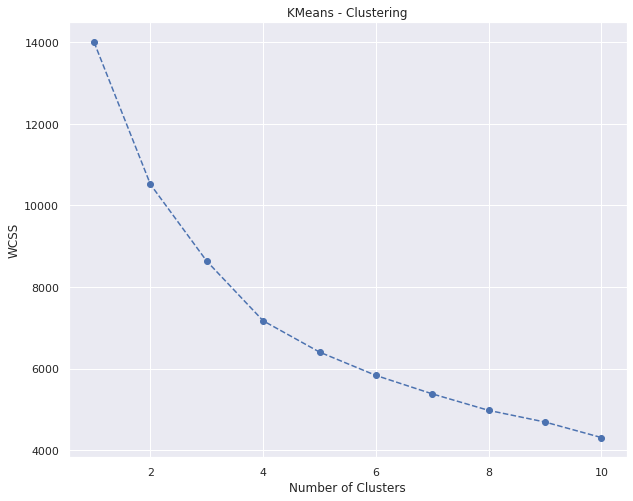

In [16]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans - Clustering')
plt.show()

In [17]:
#segundo o metodo do cotovelo indicado nesse braço, o melhor corte é o 4

In [18]:
kmeans=KMeans(n_clusters=4, init = 'k-means++', random_state=42)

In [19]:
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### **Results**

In [20]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [21]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [22]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [23]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-oppotunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-oppotunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
career focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [24]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                  1:'fewer-oppotunities',
                                                                  2:'standard',
                                                                  3:'career focused'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


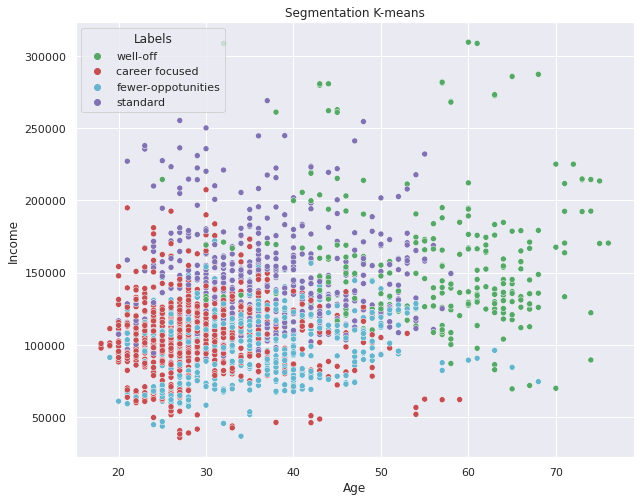

In [25]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_kmeans['Labels'], palette= ['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

## **PCA**

In [26]:
pca = PCA()

In [27]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

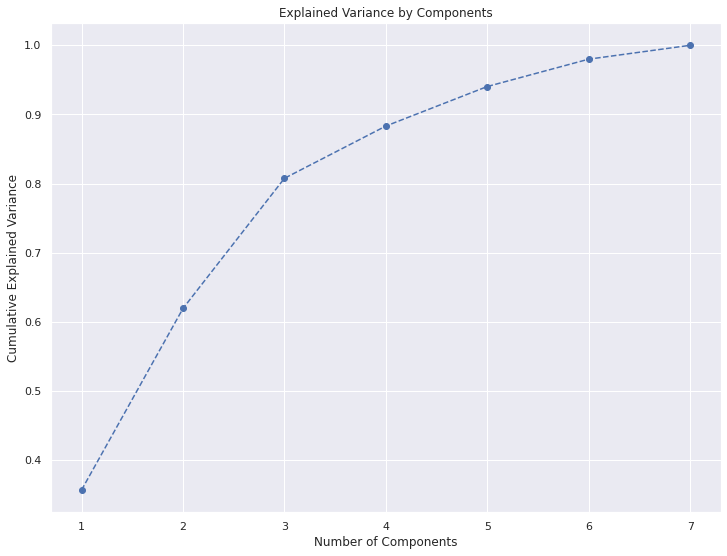

In [29]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [30]:
pca = PCA(n_components=3)

In [31]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### **PCA Results**

In [32]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [33]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns = df_segmentation.columns.values,
                           index=['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


<function matplotlib.pyplot.show>

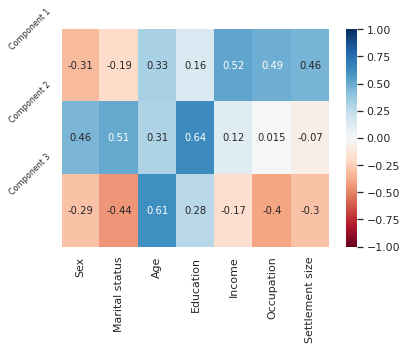

In [34]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0,1,2],
           ['Component 1','Component 2','Component 3'],
           rotation = 45,
           fontsize = 8
           )
plt.show

In [35]:
# quando olhamos o mapa acima, temos que o componente 1 tem melhores resultados nos elementos de carreira (income, ocupation e settlement size)
# quanto ao componente 2: temos educaçao, estatus cível e genero, podendo dizer que há maior interesse em elementos Lifestyle e Education
# enquanto isso no elemento 3, é relacionado a idade e educaçao, podendo fazer assim uma referencia a experiencia de vida

In [36]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

### **K-means clustering with PCA**

In [37]:
scores_pca = pca.transform(segmentation_std)

In [38]:
wcss = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

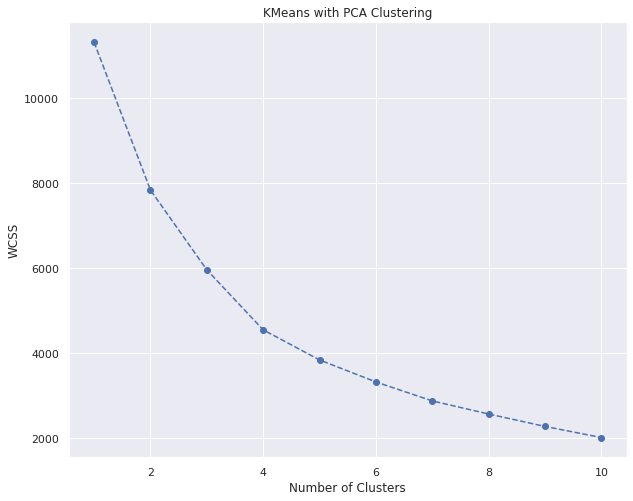

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker = 'o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans with PCA Clustering')
plt.show()

In [40]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [41]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### **K-means clustering with PCA - Results**

In [42]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1','Component 2','Componente 3']
df_segm_pca_kmeans['Segment Kmeans PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Componente 3,Segment Kmeans PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3


In [43]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment Kmeans PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Componente 3
Segment Kmeans PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [44]:
#de acordo com a analise dos componentes, temos que o compontente 1 é relacionado a Carreira, 2: Education Lifestyle, 3: Experience, sendo assim, podemos renomear os cluster de acordo com os componenttes

In [45]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment Kmeans PCA','Sex']].groupby(['Segment Kmeans PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'well-off',
                                                         1:'fewer-oppotunities',
                                                         2:'standard',
                                                         3:'career focused'})


df_segm_pca_kmeans_freq


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Componente 3,N Obs,Prop Obs
Segment Kmeans PCA,,,,,,,,,,,,
well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
fewer-oppotunities,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [46]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment Kmeans PCA'].map({0:'well-off',
                                                                             1:'fewer-oppotunities',
                                                                             2:'standard',
                                                                             3:'career focused'})


In [137]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Componente 3,Segment Kmeans PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1,fewer-oppotunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3,career focused


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


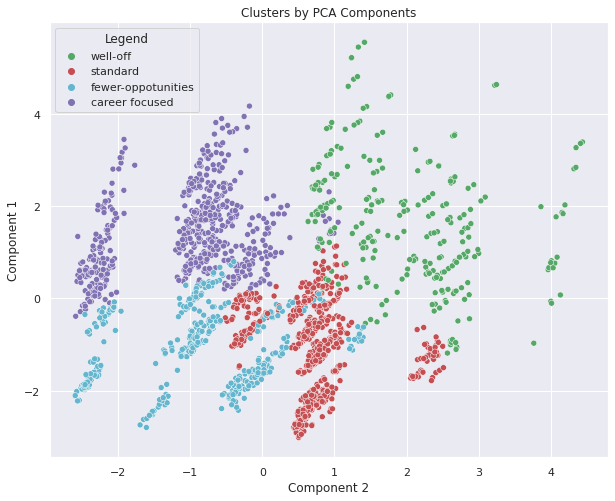

In [47]:
#para criar o grafico 2D, escolha os 2 componentes mais importantes para a sua analise
x_axis= df_segm_pca_kmeans['Component 2']
y_axis= df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue =df_segm_pca_kmeans['Legend'],palette=['g','r', 'c','m'] )
plt.title('Clusters by PCA Components')
plt.show()

In [48]:
#como 3 componentes foram o suficiente para separar os dados, usar um grafico 2D conseguiu mostrar muito bem os clusters, mas caso vc tenha mais componentes, terá que fazer de uma outra forma para mostrar esse resultado, pois somente 2 componentes, podem não ser suficientes para representacao grafica

## **Data Export**

In [50]:
pickle.dump(scaler, open('scaler.pickle','wb'))

In [51]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [53]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle','wb'))